In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sympy import *

In [2]:
x_n = np.arange(0.001, 2*np.pi, 0.001)
y1 = ((2*np.sin(x_n))/x_n) + 2
y2 = 2-(np.cos(x_n-1))

In [3]:


x=Symbol('x')
f = 2*(sin(x)/x)+cos(x-1)
f_dot = f.diff()
y1_s = 2*(sin(x)/x) + 2
y2_s = 2-cos(x-1)


In [4]:
f_np = lambdify(x, f, "numpy")
f_dot_np = lambdify(x, f_dot, "numpy")
y1_np = lambdify(x, y1_s, "numpy")
y2_np = lambdify(x, y2_s, "numpy")

In [5]:
def NewtonRaphson(p0, tol, f, der_f, No):
    i=1
    salida="No lo logre"
    while i<No:
        p = p0 - ((f(p0))/(der_f(p0)))
        if abs(p-p0) < tol:
            #print("Lo logre. La raíz esta: ", p)
            salida = (p,i)
            break
        i = i+1
        p0 = p
    return salida

In [6]:
L1, i1 = NewtonRaphson(np.pi/2, 1e-5, f_np, f_dot_np, 1000)
L2, i2 = NewtonRaphson(6.3, 1e-5, f_np, f_dot_np, 1000)
#print(f_np(L1))
#print(L2)

-2.498001805406602e-16
5.85477841258161


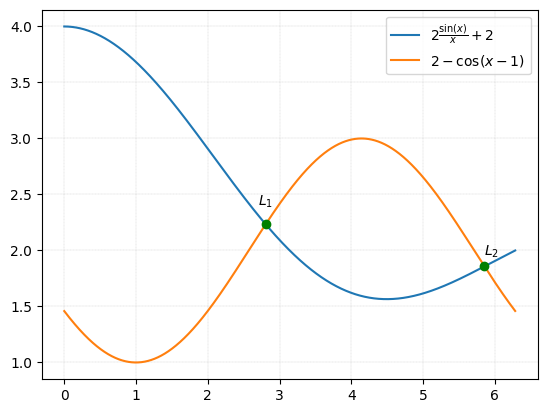

In [36]:
fig, ax = plt.subplots()
ax.scatter([L1, L2], [y1_np(L1), y2_np(L2)], color="g", zorder=10)
ax.plot(x_n, y1, label=r'$2\frac{\sin(x)}{x} + 2$')
ax.plot(x_n, y2, label=r'$2 - \cos(x-1)}$')
ax.text(2.7, 2.4, r'$L_1$')
ax.text(L2, y2_np(L2)+0.1, r'$L_2$')
ax.grid(linestyle = '--', linewidth = 0.2)
ax.legend()